A quick demo on the classic digit recognition problem

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
#train_split = 20
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# mnist will set it's own test-train split

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [4]:
layer_units = 128

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(layer_units, activation='relu')) # first layer
model.add(tf.keras.layers.Dense(layer_units, activation='relu')) # second layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))       # third layer: 10 digits

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(X_train, Y_train, epochs=5)
model.save('digit_recog_model')

Epoch 1/5


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2702 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0436 - accuracy: 0.9860
INFO:tensorflow:Assets written to: digit_recog_model\assets


INFO:tensorflow:Assets written to: digit_recog_model\assets


In [7]:
model = tf.keras.models.load_model('digit_recog_model')

In [8]:
loss, accuracy = model.evaluate(X_test, Y_test)
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9760


(0.08451767265796661, 0.9760000109672546)

1/1 [==============================] - 0s 90ms/step
Prediction:  5


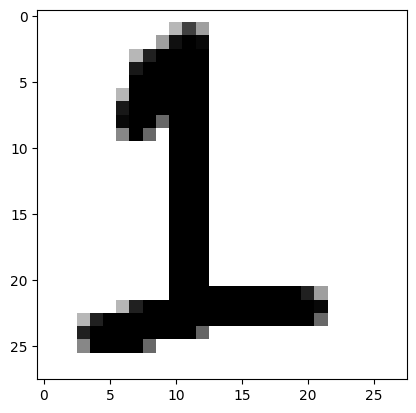

1/1 [==============================] - 0s 22ms/step
Prediction:  2


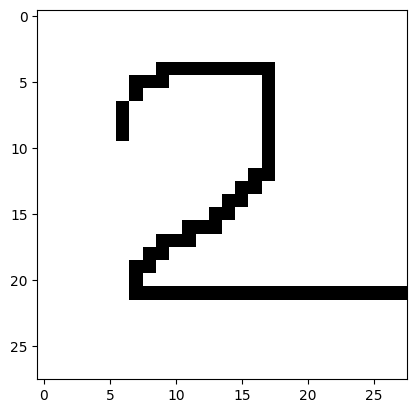

1/1 [==============================] - 0s 23ms/step
Prediction:  5


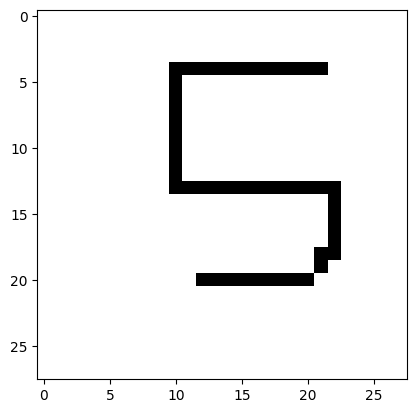

1/1 [==============================] - 0s 26ms/step
Prediction:  1


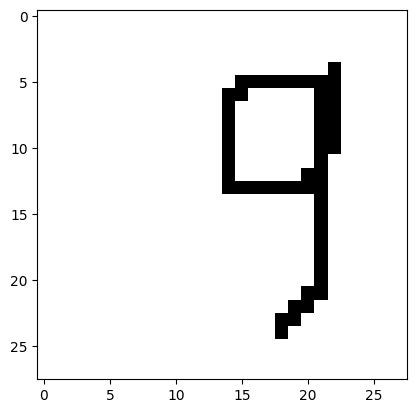

1/1 [==============================] - 0s 23ms/step
Prediction:  8


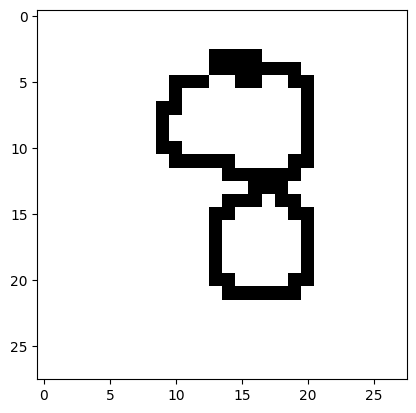

1/1 [==============================] - 0s 22ms/step
Prediction:  3


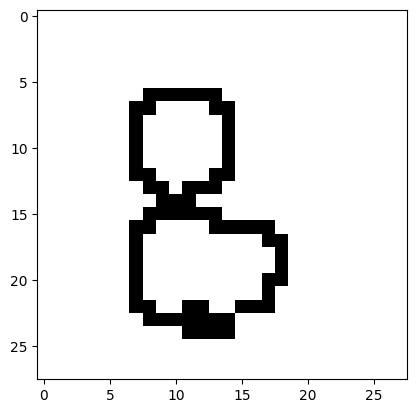

1/1 [==============================] - 0s 25ms/step
Prediction:  9


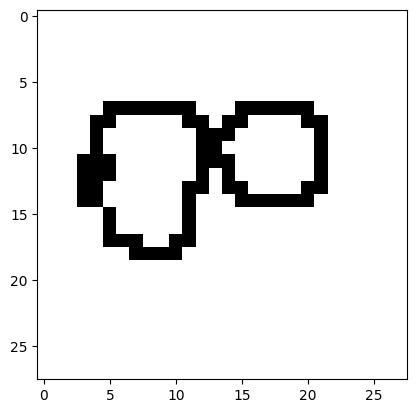

1/1 [==============================] - 0s 23ms/step
Prediction:  2


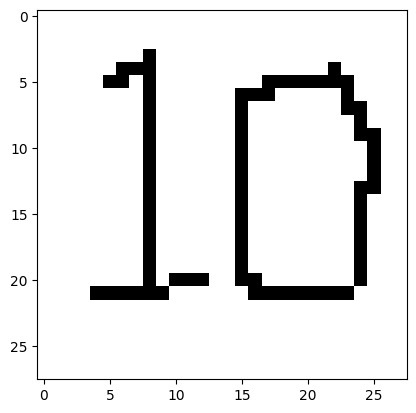

1/1 [==============================] - 0s 22ms/step
Prediction:  3


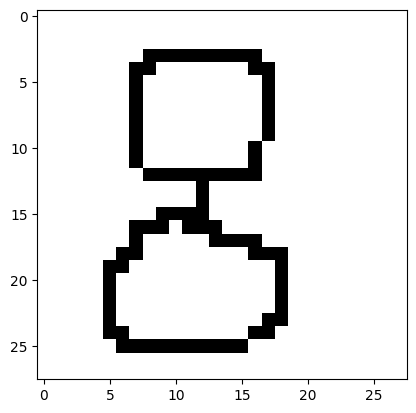

1/1 [==============================] - 0s 23ms/step
Prediction:  3


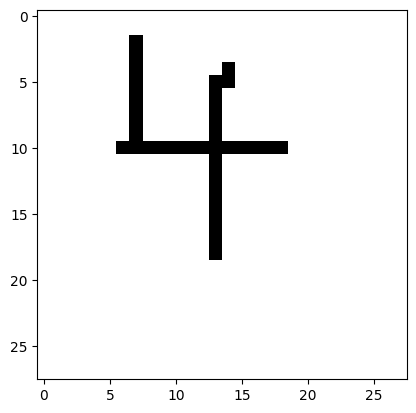

1/1 [==============================] - 0s 20ms/step
Prediction:  9


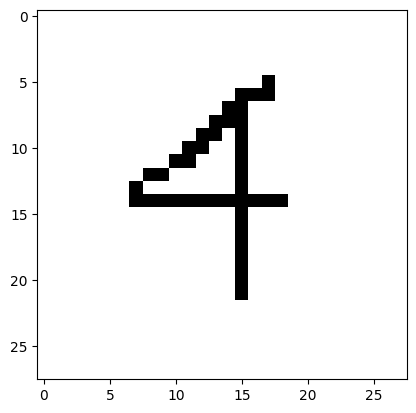

1/1 [==============================] - 0s 21ms/step
Prediction:  7


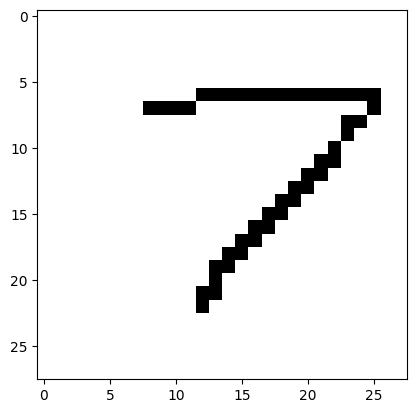

1/1 [==============================] - 0s 23ms/step
Prediction:  7


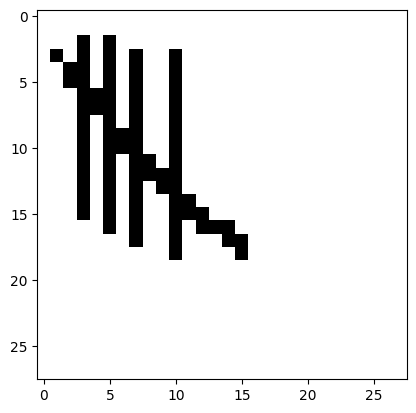

1/1 [==============================] - 0s 24ms/step
Prediction:  0


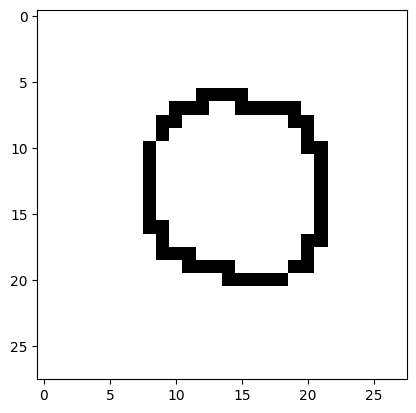

In [9]:
index = 1
while os.path.isfile(f"digit_recog_model/assets/digit{index}.png"):
    img = cv2.imread(f"digit_recog_model/assets/digit{index}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("Prediction: ", np.argmax(prediction))
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    index += 1

Hmmm... not super accurate with my samples